In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols
from scipy import stats
%matplotlib inline
from sklearn.preprocessing import PolynomialFeatures

Inspecting Data

<AxesSubplot:>

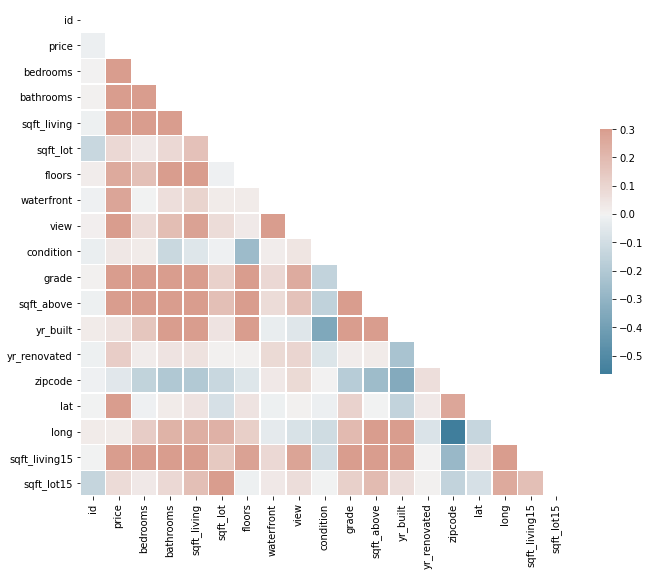

In [3]:
df.corr()




,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.000000,-0.016772,0.001150,0.005162,-0.012241,-0.131911,0.018608,-0.004176,0.011592,-0.023803,0.008188,-0.010799,0.021617,-0.012010,-0.008211,-0.001798,0.020672,-0.002701,-0.138557
price,-0.016772,1.000000,0.308787,0.525906,0.701917,0.089876,0.256804,0.276295,0.395734,0.036056,0.667951,0.605368,0.053953,0.129599,-0.053402,0.306692,0.022036,0.585241,0.082845
bedrooms,0.001150,0.308787,1.000000,0.514508,0.578212,0.032471,0.177944,-0.002386,0.078523,0.026496,0.356563,0.479386,0.155670,0.018495,-0.154092,-0.009951,0.132054,0.393406,0.030690
bathrooms,0.005162,0.525906,0.514508,1.000000,0.755758,0.088373,0.502582,0.067282,0.186451,-0.126479,0.665838,0.686668,0.507173,0.051050,-0.204786,0.024280,0.224903,0.569884,0.088303
sqft_living,-0.012241,0.701917,0.578212,0.755758,1.000000,0.173453,0.353953,0.110230,0.282532,-0.059445,0.762779,0.876448,0.318152,0.055660,-0.199802,0.052155,0.241214,0.756402,0.184342
sqft_lot,-0.131911,0.089876,0.032471,0.088373,0.173453,1.000000,-0.004814,0.023143,0.075298,-0.008830,0.114731,0.184139,0.052946,0.004513,-0.129586,-0.085514,0.230227,0.144763,0.718204
floors,0.018608,0.256804,0.177944,0.502582,0.353953,-0.004814,1.000000,0.021883,0.028436,-0.264075,0.458794,0.523989,0.489193,0.003535,-0.059541,0.049239,0.125943,0.280102,-0.010722
waterfront,-0.004176,0.276295,-0.002386,0.067282,0.110230,0.023143,0.021883,1.000000,0.406654,0.017642,0.087383,0.075463,-0.026079,0.087244,0.031057,-0.012772,-0.039864,0.088860,0.032002
view,0.011592,0.395734,0.078523,0.186451,0.282532,0.075298,0.028436,0.406654,1.000000,0.045735,0.249727,0.166299,-0.054564,0.100964,0.085277,0.006141,-0.077894,0.279561,0.073332
condition,-0.023803,0.036056,0.026496,-0.126479,-0.059445,-0.008830,-0.264075,0.017642,0.045735,1.000000,-0.146896,-0.158904,-0.361592,-0.061858,0.002888,-0.015102,-0.105877,-0.093072,-0.003126


In [4]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,19221.000000,21534.000000,21597.000000,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007596,0.233863,3.409825,7.657915,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086825,0.765686,0.650546,1.173200,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [6]:
df=df[['price','sqft_living','bedrooms','bathrooms','floors','grade','yr_built','yr_renovated','waterfront']]
df

,price,sqft_living,bedrooms,bathrooms,floors,grade,yr_built,yr_renovated,waterfront
0,221900.0,1180,3,1.00,1.0,7,1955,0.0,NaN
1,538000.0,2570,3,2.25,2.0,7,1951,1991.0,0.0
2,180000.0,770,2,1.00,1.0,6,1933,NaN,0.0
3,604000.0,1960,4,3.00,1.0,7,1965,0.0,0.0
4,510000.0,1680,3,2.00,1.0,8,1987,0.0,0.0
...,...,...,...,...,...,...,...,...,...
21592,360000.0,1530,3,2.50,3.0,8,2009,0.0,0.0
21593,400000.0,2310,4,2.50,2.0,8,2014,0.0,0.0
21594,402101.0,1020,2,0.75,2.0,7,2009,0.0,0.0
21595,400000.0,1600,3,2.50,2.0,8,2004,0.0,NaN


In [7]:
df.isnull().sum()
df['yr_renovated'] = df['yr_renovated'].fillna(0)
df.isnull().sum()


price              0
sqft_living        0
bedrooms           0
bathrooms          0
floors             0
grade              0
yr_built           0
yr_renovated       0
waterfront      2376
dtype: int64

In [8]:
df['waterfront'] = df['waterfront'].fillna(0)

REMOVING OUTLIERS 

In [9]:
value_counts_bed=df['bedrooms'].value_counts()
to_remove = value_counts_bed[value_counts_bed <=50].index
df = df[~df.bedrooms.isin(to_remove)]

In [10]:
value_counts_bath=df['bathrooms'].value_counts()
to_remove_bath = value_counts_bath[value_counts_bath <=80].index
df = df[~df.bathrooms.isin(to_remove_bath)]

In [11]:
value_counts_floors=df['floors'].value_counts()
to_remove_floor = value_counts_floors[value_counts_floors <=10].index
df = df[~df.floors.isin(to_remove_floor)]

In [12]:
print(df.loc[df['yr_built'] == 1940])
df.drop(df[df.price == 1150000.0].index, inplace=True) 

           price  sqft_living  bedrooms  bathrooms  floors  grade  yr_built  \
241     210000.0          830         2       1.00     1.0      6      1940   
376     450000.0         1640         3       1.75     1.0      7      1940   
671     435000.0         1700         4       2.50     1.0      7      1940   
748     517500.0         1430         3       1.50     1.0      7      1940   
986     260000.0         1480         3       1.00     1.5      6      1940   
...          ...          ...       ...        ...     ...    ...       ...   
19320   345000.0         1080         2       1.00     1.0      7      1940   
19321   874950.0         1080         2       1.00     1.0      7      1940   
19397   445000.0         1150         2       2.00     1.0      7      1940   
19606  1150000.0         1760         3       1.75     2.0      7      1940   
21224   525000.0         1030         1       1.50     1.0      8      1940   

       yr_renovated  waterfront  
241             0

In [13]:
df.drop(df[df.price == 7060000.0].index, inplace=True) 

In [14]:
df.drop(df[df.price == 4490000.0].index, inplace=True) 

In [15]:
for x in ['price']:
    q75,q25 = np.percentile(df.loc[:,x],[75,25])
    intr_qr = q75-q25

    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)

    df.loc[df[x] < min,x] = np.nan
    df.loc[df[x] > max,x] = np.nan
df.isnull().sum()
df = df.dropna(axis = 0)
df.isnull().sum()


price           0
sqft_living     0
bedrooms        0
bathrooms       0
floors          0
grade           0
yr_built        0
yr_renovated    0
waterfront      0
dtype: int64

In [16]:
f = 'grade~price'
model = ols(formula=f, data=df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  grade   R-squared:                       0.395
Model:                            OLS   Adj. R-squared:                  0.395
Method:                 Least Squares   F-statistic:                 1.323e+04
Date:                Tue, 06 Jul 2021   Prob (F-statistic):               0.00
Time:                        12:41:49   Log-Likelihood:                -24133.
No. Observations:               20249   AIC:                         4.827e+04
Df Residuals:                   20247   BIC:                         4.829e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.0488      0.014    430.145      0.000       6.021       6.076
price       3.117e-06   2.71e-08    115.026      0.000    3.06e-06    3.17e-06
==============================================================================
Omnibus:                      128.894   Durbin-Watson:                   1.889
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              170.277
Skew:                           0.097   Prob(JB):                     1.06e-37
Kurtosis:                       3.406   Cond. No.                     1.30e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.3e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

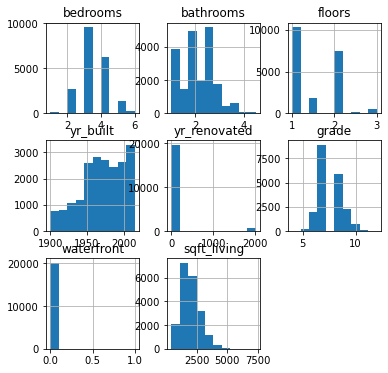

In [17]:
df[['bedrooms', 'bathrooms', 'floors', 'yr_built','yr_renovated','grade','waterfront','sqft_living']].hist(figsize  = [6, 6]); 

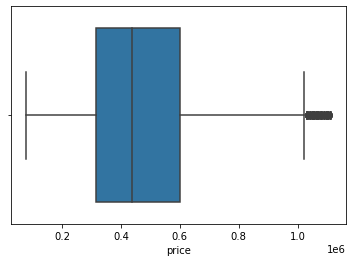

In [18]:
ax = sns.boxplot(x="price", data=df)

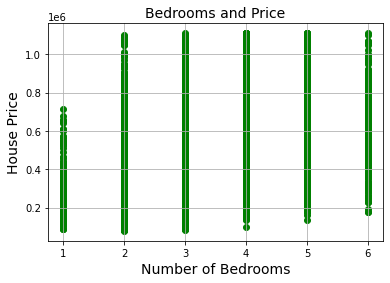

In [19]:
plt.scatter(df['bedrooms'], df['price'], color='green')
plt.title('Bedrooms and Price', fontsize=14)
plt.xlabel('Number of Bedrooms', fontsize=14)
plt.ylabel('House Price', fontsize=14)
plt.grid(True)
plt.show()

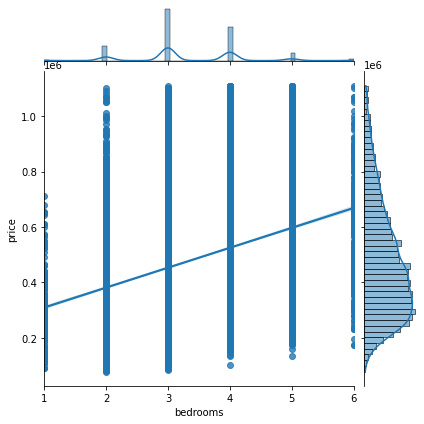

In [20]:
sns.jointplot(data=df, x="bedrooms", y="price", kind="reg")

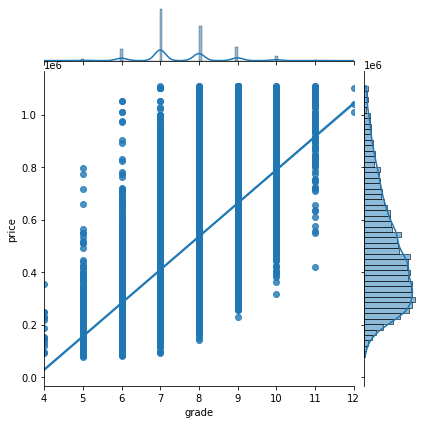

In [21]:
sns.jointplot(data=df, x="grade", y="price", kind="reg")

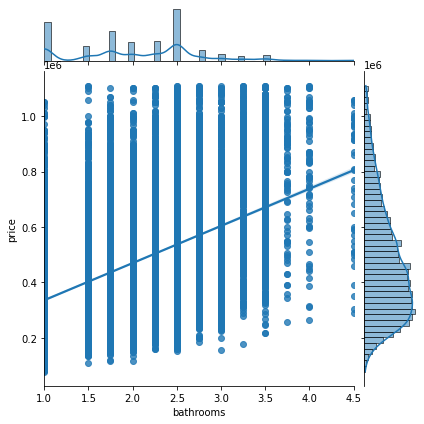

In [22]:
sns.jointplot(data=df, x="bathrooms", y="price", kind="reg")

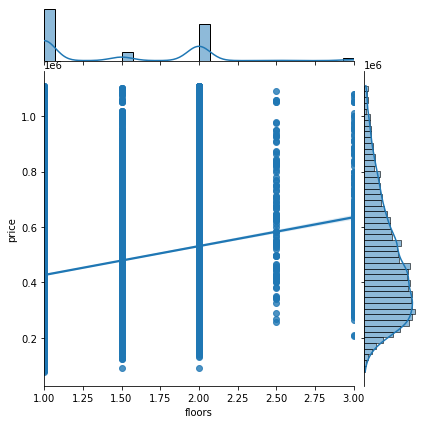

In [23]:
sns.jointplot(data=df, x="floors", y="price", kind="reg")

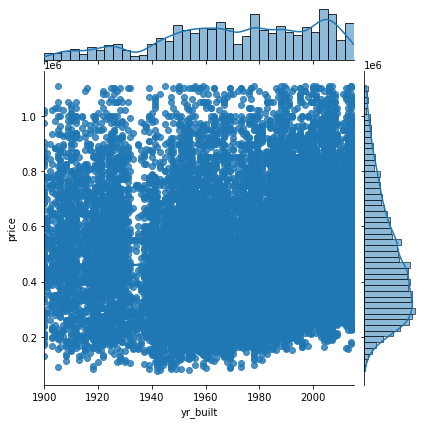

In [24]:
sns.jointplot(data=df, x="yr_built", y="price", kind="reg")

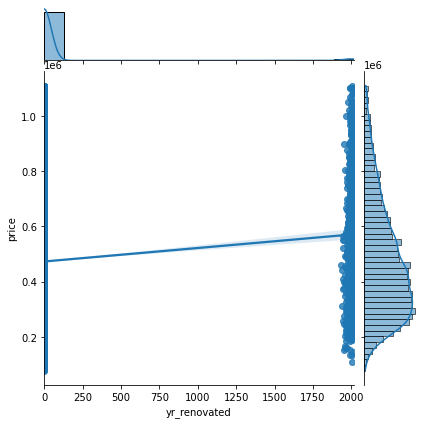

In [25]:
sns.jointplot(data=df, x="yr_renovated", y="price", kind="reg")

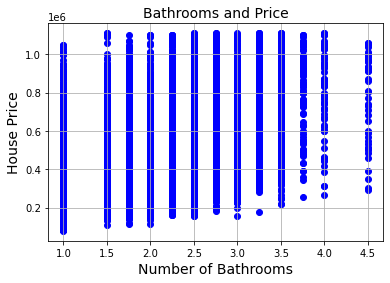

In [26]:
plt.scatter(df['bathrooms'], df['price'], color='blue')
plt.title('Bathrooms and Price', fontsize=14)
plt.xlabel('Number of Bathrooms', fontsize=14)
plt.ylabel('House Price', fontsize=14)
plt.grid(True)
plt.show()

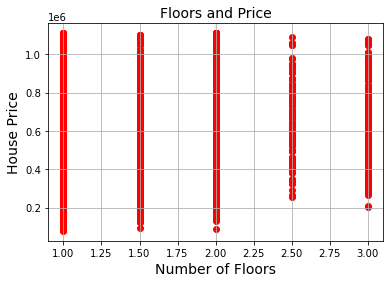

In [27]:
plt.scatter(df['floors'], df['price'], color='red')
plt.title('Floors and Price', fontsize=14)
plt.xlabel('Number of Floors', fontsize=14)
plt.ylabel('House Price', fontsize=14)
plt.grid(True)
plt.show()

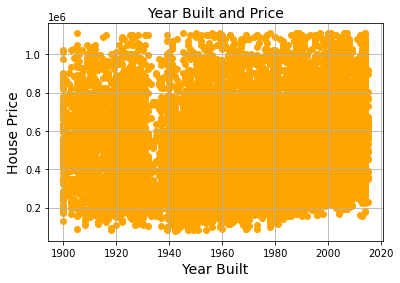

In [28]:
plt.scatter(df['yr_built'], df['price'], color='orange')
plt.title('Year Built and Price', fontsize=14)
plt.xlabel('Year Built', fontsize=14)
plt.ylabel('House Price', fontsize=14)
plt.grid(True)
plt.show()

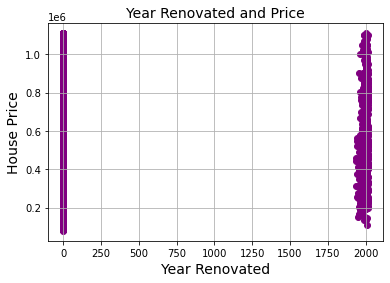

In [29]:
plt.scatter(df['yr_renovated'], df['price'], color='purple')
plt.title('Year Renovated and Price', fontsize=14)
plt.xlabel('Year Renovated', fontsize=14)
plt.ylabel('House Price', fontsize=14)
plt.grid(True)
plt.show()

array([[<AxesSubplot:title={'center':'bedrooms'}>,
        <AxesSubplot:title={'center':'bathrooms'}>],
       [<AxesSubplot:title={'center':'floors'}>,
        <AxesSubplot:title={'center':'yr_built'}>],
       [<AxesSubplot:title={'center':'grade'}>,
        <AxesSubplot:title={'center':'sqft_living'}>]], dtype=object)

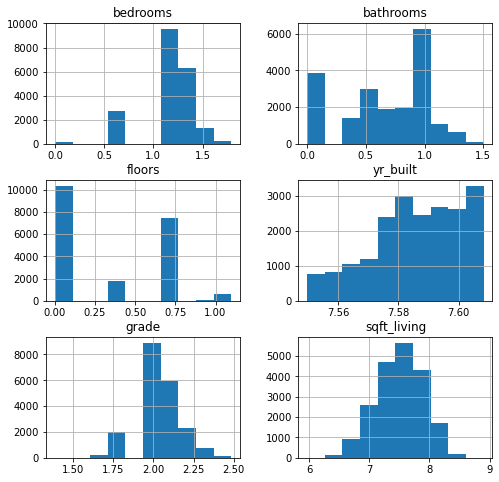

In [30]:
# Cannot use log transform on zero values

data_log = pd.DataFrame([])
data_log['bedrooms'] = np.log(df['bedrooms'])
data_log['bathrooms'] = np.log(df['bathrooms'])
data_log['floors'] = np.log(df['floors'])
data_log['yr_built'] = np.log(df['yr_built'])
data_log['grade'] = np.log(df['grade'])
data_log['sqft_living'] = np.log(df['sqft_living'])
data_log.hist(figsize=(8,8))


In [31]:
df.head()

,price,sqft_living,bedrooms,bathrooms,floors,grade,yr_built,yr_renovated,waterfront
0,221900.0,1180,3,1.00,1.0,7,1955,0.0,0.0
1,538000.0,2570,3,2.25,2.0,7,1951,1991.0,0.0
2,180000.0,770,2,1.00,1.0,6,1933,0.0,0.0
3,604000.0,1960,4,3.00,1.0,7,1965,0.0,0.0
4,510000.0,1680,3,2.00,1.0,8,1987,0.0,0.0


## Multicollinearity

In [32]:
data_pred = df.iloc[:, 1:8]
data_pred.head()

,sqft_living,bedrooms,bathrooms,floors,grade,yr_built,yr_renovated
0,1180,3,1.00,1.0,7,1955,0.0
1,2570,3,2.25,2.0,7,1951,1991.0
2,770,2,1.00,1.0,6,1933,0.0
3,1960,4,3.00,1.0,7,1965,0.0
4,1680,3,2.00,1.0,8,1987,0.0


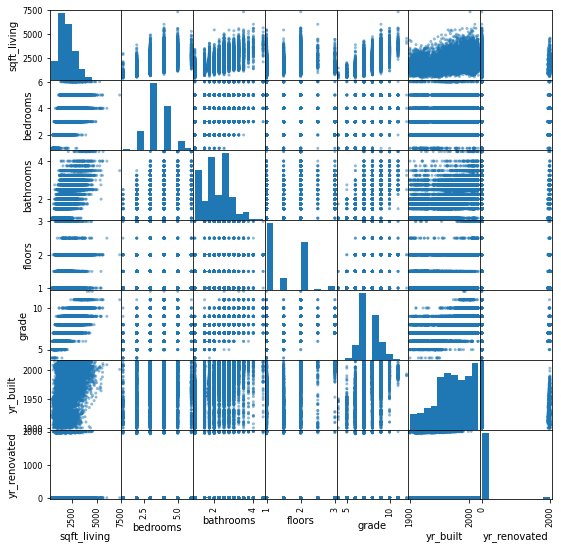

In [33]:
pd.plotting.scatter_matrix(data_pred,figsize  = [9, 9]);
plt.show()

In [34]:
data_pred.corr()

,sqft_living,bedrooms,bathrooms,floors,grade,yr_built,yr_renovated
sqft_living,1.000000,0.598772,0.709503,0.339405,0.703624,0.355695,0.018272
bedrooms,0.598772,1.000000,0.493570,0.157983,0.330064,0.172889,-0.003126
bathrooms,0.709503,0.493570,1.000000,0.505835,0.613663,0.553207,0.020182
floors,0.339405,0.157983,0.505835,1.000000,0.457415,0.511682,-0.003986
grade,0.703624,0.330064,0.613663,0.457415,1.000000,0.492598,-0.014267
yr_built,0.355695,0.172889,0.553207,0.511682,0.492598,1.000000,-0.196861
yr_renovated,0.018272,-0.003126,0.020182,-0.003986,-0.014267,-0.196861,1.000000


In [35]:
abs(data_pred.corr()) > 0.75

,sqft_living,bedrooms,bathrooms,floors,grade,yr_built,yr_renovated
sqft_living,True,False,False,False,False,False,False
bedrooms,False,True,False,False,False,False,False
bathrooms,False,False,True,False,False,False,False
floors,False,False,False,True,False,False,False
grade,False,False,False,False,True,False,False
yr_built,False,False,False,False,False,True,False
yr_renovated,False,False,False,False,False,False,True


In [36]:
df

,price,sqft_living,bedrooms,bathrooms,floors,grade,yr_built,yr_renovated,waterfront
0,221900.0,1180,3,1.00,1.0,7,1955,0.0,0.0
1,538000.0,2570,3,2.25,2.0,7,1951,1991.0,0.0
2,180000.0,770,2,1.00,1.0,6,1933,0.0,0.0
3,604000.0,1960,4,3.00,1.0,7,1965,0.0,0.0
4,510000.0,1680,3,2.00,1.0,8,1987,0.0,0.0
...,...,...,...,...,...,...,...,...,...
21590,1010000.0,3510,4,3.50,2.0,9,2009,0.0,0.0
21591,475000.0,1310,3,2.50,2.0,8,2008,0.0,0.0
21592,360000.0,1530,3,2.50,3.0,8,2009,0.0,0.0
21593,400000.0,2310,4,2.50,2.0,8,2014,0.0,0.0


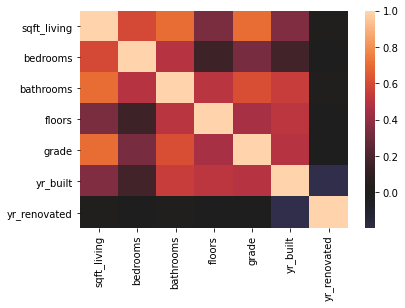

In [37]:
import seaborn as sns
sns.heatmap(data_pred.corr(), center=0);

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20249 entries, 0 to 21595
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         20249 non-null  float64
 1   sqft_living   20249 non-null  int64  
 2   bedrooms      20249 non-null  int64  
 3   bathrooms     20249 non-null  float64
 4   floors        20249 non-null  float64
 5   grade         20249 non-null  int64  
 6   yr_built      20249 non-null  int64  
 7   yr_renovated  20249 non-null  float64
 8   waterfront    20249 non-null  float64
dtypes: float64(5), int64(4)
memory usage: 1.5 MB


In [39]:
df.corr()

,price,sqft_living,bedrooms,bathrooms,floors,grade,yr_built,yr_renovated,waterfront
price,1.000000,0.618159,0.297123,0.449787,0.270257,0.628660,0.058211,0.080852,0.053899
sqft_living,0.618159,1.000000,0.598772,0.709503,0.339405,0.703624,0.355695,0.018272,0.007734
bedrooms,0.297123,0.598772,1.000000,0.493570,0.157983,0.330064,0.172889,-0.003126,-0.021662
bathrooms,0.449787,0.709503,0.493570,1.000000,0.505835,0.613663,0.553207,0.020182,0.004179
floors,0.270257,0.339405,0.157983,0.505835,1.000000,0.457415,0.511682,-0.003986,-0.001627
grade,0.628660,0.703624,0.330064,0.613663,0.457415,1.000000,0.492598,-0.014267,-0.005566
yr_built,0.058211,0.355695,0.172889,0.553207,0.511682,0.492598,1.000000,-0.196861,-0.031232
yr_renovated,0.080852,0.018272,-0.003126,0.020182,-0.003986,-0.014267,-0.196861,1.000000,0.051816
waterfront,0.053899,0.007734,-0.021662,0.004179,-0.001627,-0.005566,-0.031232,0.051816,1.000000


In [40]:
df.corr()[abs(df.corr()['price']) > 0.3]

,price,sqft_living,bedrooms,bathrooms,floors,grade,yr_built,yr_renovated,waterfront
price,1.000000,0.618159,0.297123,0.449787,0.270257,0.628660,0.058211,0.080852,0.053899
sqft_living,0.618159,1.000000,0.598772,0.709503,0.339405,0.703624,0.355695,0.018272,0.007734
bathrooms,0.449787,0.709503,0.493570,1.000000,0.505835,0.613663,0.553207,0.020182,0.004179
grade,0.628660,0.703624,0.330064,0.613663,0.457415,1.000000,0.492598,-0.014267,-0.005566


In [41]:
df.corr()['price']

price           1.000000
sqft_living     0.618159
bedrooms        0.297123
bathrooms       0.449787
floors          0.270257
grade           0.628660
yr_built        0.058211
yr_renovated    0.080852
waterfront      0.053899
Name: price, dtype: float64

In [42]:
set1 = list(df.corr()[abs(df.corr()['price']) > 0.3].index)

In [45]:
formula = 'price ~ '+ '+'.join(set1[1:])
model = ols(formula=formula, data=df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.459
Model:                            OLS   Adj. R-squared:                  0.459
Method:                 Least Squares   F-statistic:                     5719.
Date:                Tue, 06 Jul 2021   Prob (F-statistic):               0.00
Time:                        12:44:49   Log-Likelihood:            -2.7034e+05
No. Observations:               20249   AIC:                         5.407e+05
Df Residuals:                   20245   BIC:                         5.407e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -2.951e+05   8831.159    -33.420      0.000   -3.12e+05   -2.78e+05
sqft_living   104.9412      2.274     46.142      0.000     100.483     109.399
bathrooms   -2.072e+04   2247.807     -9.219      0.000   -2.51e+04   -1.63e+04
grade        8.056e+04   1507.615     53.433      0.000    7.76e+04    8.35e+04
==============================================================================
Omnibus:                     1184.894   Durbin-Watson:                   1.964
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1432.491
Skew:                           0.599   Prob(JB):                    8.68e-312
Kurtosis:                       3.511   Cond. No.                     1.77e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.77e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""